# Esercitazione 7

# Equilibrazione

Ho inizialmente studiato il tempo di equilibrazione per tutti e tre i sistemi:

solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)

liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)

gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Possiamo notare che in tutte le situazioni, dopo circa 250 step il sistema ha equilibrato.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from scipy.optimize import curve_fit
import pandas as pd

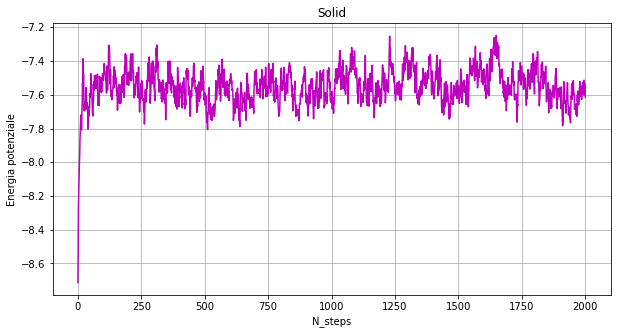

In [2]:
fig=plt.figure(figsize=(10, 5))

file=open("MonteCarlo_NVT/output.walker.epot_solid.dat", "r")
f=np.loadtxt("MonteCarlo_NVT/output.walker.epot_solid.dat", usecols=(0))
plt.plot(range(len(f)), f, color = 'm')
plt.xlabel('N_steps')
plt.ylabel('Energia potenziale')
plt.title('Solid')
plt.grid(True)

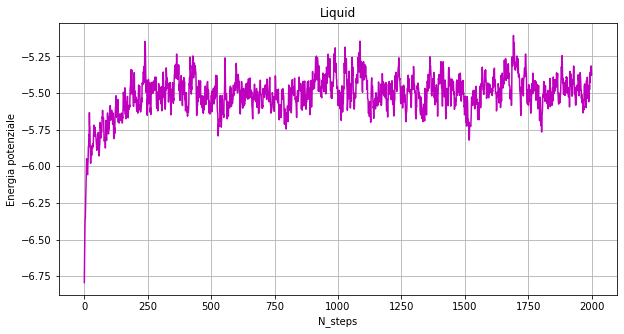

In [3]:
fig=plt.figure(figsize=(10, 5))

file=open("MonteCarlo_NVT/output.walker.epot_liquid.dat", "r")
f=np.loadtxt("MonteCarlo_NVT/output.walker.epot_liquid.dat", usecols=(0))
plt.plot(range(len(f)), f, color = 'm')
plt.xlabel('N_steps')
plt.ylabel('Energia potenziale')
plt.title('Liquid')
plt.grid(True)

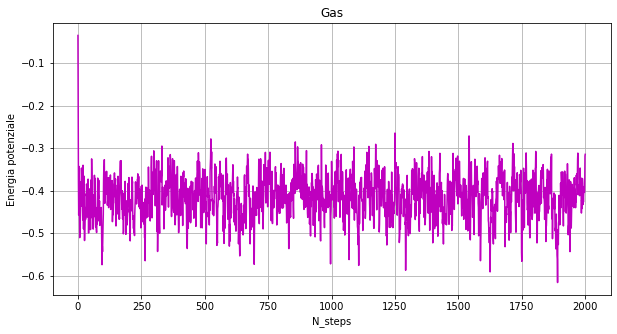

In [4]:
fig=plt.figure(figsize=(10, 5))

file=open("MonteCarlo_NVT/output.walker.epot_gas.dat", "r")
f=np.loadtxt("MonteCarlo_NVT/output.walker.epot_gas.dat", usecols=(0))
plt.plot(range(len(f)), f, color = 'm')
plt.xlabel('N_steps')
plt.ylabel('Energia potenziale')
plt.title('Gas')
plt.grid(True)

## Autocorrelazione

In [5]:
def autocovariance(dati, step):
    n=len(dati)
    mean=0
    for x in dati:
        mean=mean+x
    mean=mean/n
    c=0
    for i in range (n-step):
        c=c+(dati[i]-mean)*(dati[i+step]-mean)
    return c/n
        
def autocorrelation(dati, step):
    return autocovariance(dati, step)/autocovariance(dati, 0)

def fit (t, t0):
    return[np.exp(-x/t0) for x in t]

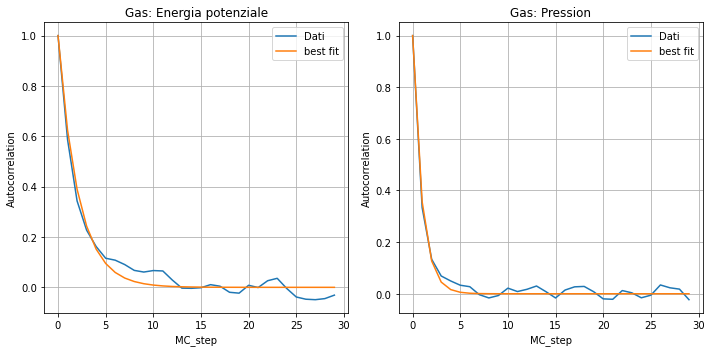

In [6]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes=axes.flatten()

max_step=30


u=np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_gas.dat", usecols=(0), delimiter='\t')
u_acorr=[autocorrelation(u, t) for t in range(max_step)]
u_acorr_time, u_variance= curve_fit(fit, range (max_step), u_acorr, p0=1)

axes[0].set_title('Gas: Energia potenziale')
axes[0].plot(u_acorr, label='Dati')
axes[0].plot( fit (range(max_step), u_acorr_time[0]), label='best fit')



p=np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_gas.dat", usecols=(1), delimiter='\t')
p_acorr=[autocorrelation(p, t) for t in range(max_step)]
p_acorr_time, p_variance= curve_fit(fit, range (max_step), p_acorr, p0=1)

axes[1].set_title('Gas: Pression')
axes[1].plot(p_acorr, label='Dati')
axes[1].plot( fit (range(max_step), p_acorr_time[0]), label='best fit')



for ax in axes:
    ax.set_ylabel('Autocorrelation')
    ax.set_xlabel('MC_step')
    ax.grid(True)
    ax.legend()


    
fig.tight_layout()
plt.show()



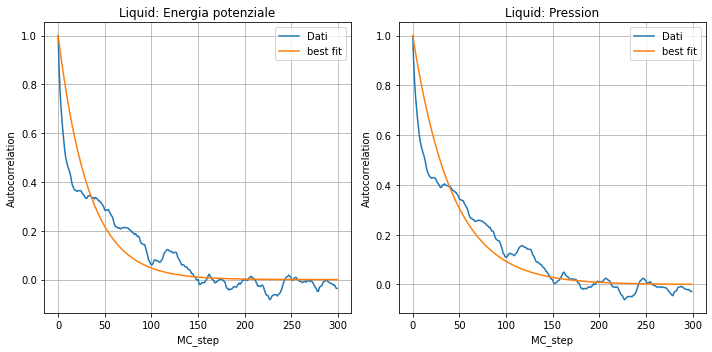

In [7]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes=axes.flatten()

max_step=300

u=np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_liquid.dat", usecols=(0), delimiter='\t')
u_acorr=[autocorrelation(u, t) for t in range(max_step)]
u_acorr_time, u_variance= curve_fit(fit, range (max_step), u_acorr, p0=1)


axes[0].set_title('Liquid: Energia potenziale')
axes[0].plot(u_acorr, label='Dati')
axes[0].plot( fit (range(max_step), u_acorr_time[0]), label='best fit')



p=np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_liquid.dat", usecols=(1), delimiter='\t')
p_acorr=[autocorrelation(p, t) for t in range(max_step)]
p_acorr_time, p_variance= curve_fit(fit, range (max_step), p_acorr, p0=1)

axes[1].set_title('Liquid: Pression')
axes[1].plot(p_acorr, label='Dati')
axes[1].plot( fit (range(max_step), p_acorr_time[0]), label='best fit')



for ax in axes:
    ax.set_ylabel('Autocorrelation')
    ax.set_xlabel('MC_step')
    ax.grid(True)
    ax.legend()


    
fig.tight_layout()
plt.show()



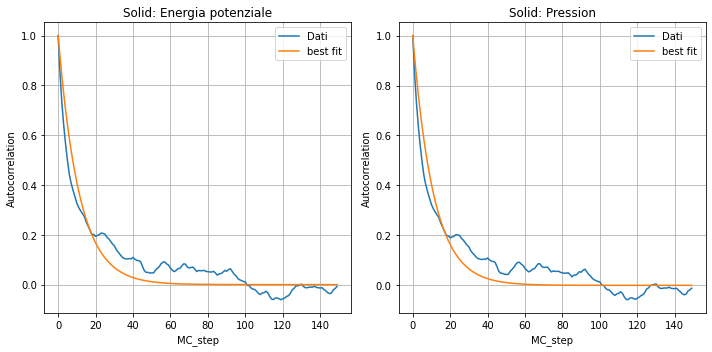

In [8]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes=axes.flatten()

max_step=150

u=np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_solid.dat", usecols=(0), delimiter='\t')
u_acorr=[autocorrelation(u, t) for t in range(max_step)]
u_acorr_time, u_variance= curve_fit(fit, range (max_step), u_acorr, p0=1)

axes[0].set_title('Solid: Energia potenziale')
axes[0].plot(u_acorr, label='Dati')
axes[0].plot( fit (range(max_step), u_acorr_time[0]), label='best fit')




p=np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_solid.dat", usecols=(1), delimiter='\t')
p_acorr=[autocorrelation(p, t) for t in range(max_step)]
p_acorr_time, p_variance= curve_fit(fit, range (max_step), p_acorr, p0=1)

axes[1].set_title('Solid: Pression')
axes[1].plot(p_acorr, label='Dati')
axes[1].plot( fit (range(max_step), p_acorr_time[0]), label='best fit')



for ax in axes:
    ax.set_ylabel('Autocorrelation')
    ax.set_xlabel('MC_step')
    ax.grid(True)
    ax.legend()


    
fig.tight_layout()
plt.show()



Osserviamo che i gafici confermano per tutte e tre le condizioni termodinamiche studiate una decrescita quasi esponenziale della correlazione. I tempi scala delle tre simulazioni, invece, sono differenti. Il numero di step Monte Carlo per cui l'autocorrelazione inizia a oscillare attorno allo zero sono:

- gas $\sim30$
- liquid $\sim300$
- solid $\sim140$



## Studio delle incertezze statistiche

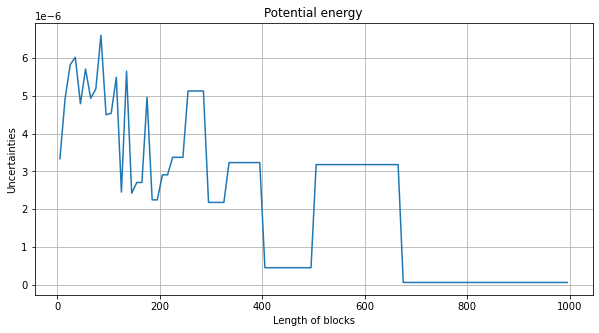

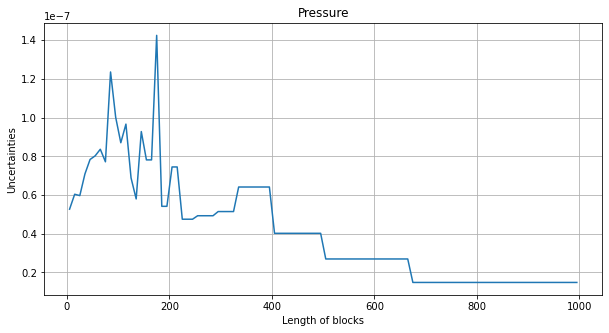

In [9]:
fig=plt.figure(figsize=(10, 5))
data = np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_gas.dat", usecols=(0), delimiter='\t')
M = len(data)
L = np.arange(5,1000,10)
N = M/L
error = np.zeros(len(L))

for j in range(len(L)):
    ave = np.zeros(int(N[j]))
    ave2 = np.zeros(int(N[j]))
    blocks = np.array_split(data,int(N[j]))
    for i in range(int(N[j])):
        ave[i] = np.mean(blocks[i])
        ave2[i] = np.mean(blocks[i])*np.mean(blocks[i])
    finalave = np.mean(ave)
    finalave2 = np.mean(ave2)
    error[j] = (finalave2-finalave*finalave)/float(len(ave))


plt.plot(L, error)
plt.xlabel("Length of blocks")
plt.ylabel("Uncertainties")
plt.title("Potential energy")
plt.grid()
plt.show()



fig=plt.figure(figsize=(10, 5))
data = np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_gas.dat", usecols=(1), delimiter='\t')
M = len(data)
L = np.arange(5,1000,10)
N = M/L
error = np.zeros(len(L))

for j in range(len(L)):
    ave = np.zeros(int(N[j]))
    ave2 = np.zeros(int(N[j]))
    blocks = np.array_split(data,int(N[j]))
    for i in range(int(N[j])):
        ave[i] = np.mean(blocks[i])
        ave2[i] = np.mean(blocks[i])*np.mean(blocks[i])
    finalave = np.mean(ave)
    finalave2 = np.mean(ave2)
    error[j] = (finalave2-finalave*finalave)/float(len(ave))


plt.plot(L, error)
plt.xlabel("Length of blocks")
plt.ylabel("Uncertainties")
plt.title("Pressure")
plt.grid()
plt.show()

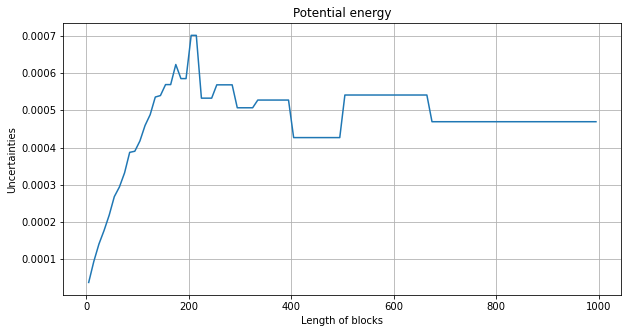

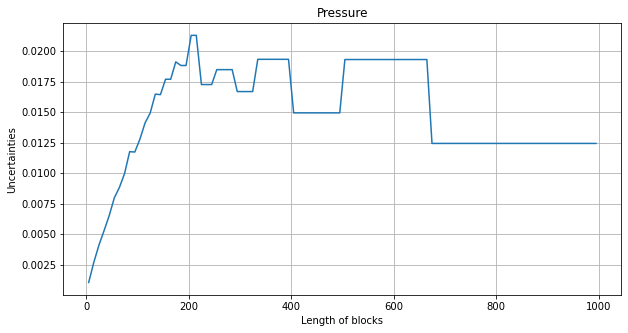

In [10]:
fig=plt.figure(figsize=(10, 5))
data = np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_liquid.dat", usecols=(0), delimiter='\t')
M = len(data)
L = np.arange(5,1000,10)
N = M/L
error = np.zeros(len(L))

for j in range(len(L)):
    ave = np.zeros(int(N[j]))
    ave2 = np.zeros(int(N[j]))
    blocks = np.array_split(data,int(N[j]))
    for i in range(int(N[j])):
        ave[i] = np.mean(blocks[i])
        ave2[i] = np.mean(blocks[i])*np.mean(blocks[i])
    finalave = np.mean(ave)
    finalave2 = np.mean(ave2)
    error[j] = (finalave2-finalave*finalave)/float(len(ave))


plt.plot(L, error)
plt.xlabel("Length of blocks")
plt.ylabel("Uncertainties")
plt.title("Potential energy")
plt.grid()
plt.show()



fig=plt.figure(figsize=(10, 5))
data = np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_liquid.dat", usecols=(1), delimiter='\t')
M = len(data)
L = np.arange(5,1000,10)
N = M/L
error = np.zeros(len(L))

for j in range(len(L)):
    ave = np.zeros(int(N[j]))
    ave2 = np.zeros(int(N[j]))
    blocks = np.array_split(data,int(N[j]))
    for i in range(int(N[j])):
        ave[i] = np.mean(blocks[i])
        ave2[i] = np.mean(blocks[i])*np.mean(blocks[i])
    finalave = np.mean(ave)
    finalave2 = np.mean(ave2)
    error[j] = (finalave2-finalave*finalave)/float(len(ave))


plt.plot(L, error)
plt.xlabel("Length of blocks")
plt.ylabel("Uncertainties")
plt.title("Pressure")
plt.grid()
plt.show()

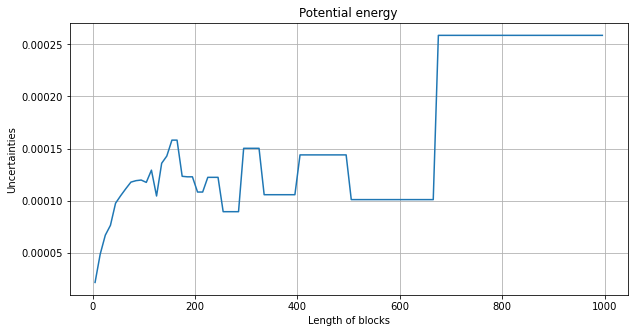

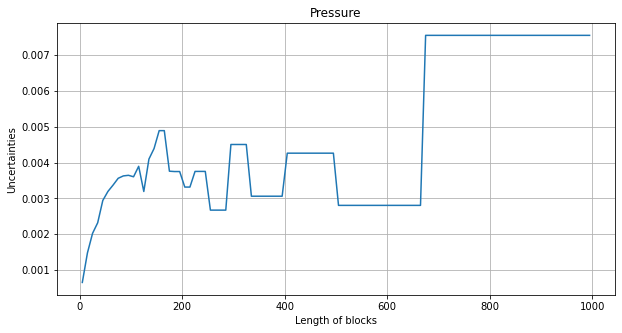

In [11]:
fig=plt.figure(figsize=(10, 5))
data = np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_solid.dat", usecols=(0), delimiter='\t')
M = len(data)
L = np.arange(5,1000,10)
N = M/L
error = np.zeros(len(L))

for j in range(len(L)):
    ave = np.zeros(int(N[j]))
    ave2 = np.zeros(int(N[j]))
    blocks = np.array_split(data,int(N[j]))
    for i in range(int(N[j])):
        ave[i] = np.mean(blocks[i])
        ave2[i] = np.mean(blocks[i])*np.mean(blocks[i])
    finalave = np.mean(ave)
    finalave2 = np.mean(ave2)
    error[j] = (finalave2-finalave*finalave)/float(len(ave))


plt.plot(L, error)
plt.xlabel("Length of blocks")
plt.ylabel("Uncertainties")
plt.title("Potential energy")
plt.grid()
plt.show()



fig=plt.figure(figsize=(10, 5))
data = np.loadtxt("MonteCarlo_NVT/output_walker_epot_press_solid.dat", usecols=(1), delimiter='\t')
M = len(data)
L = np.arange(5,1000,10)
N = M/L
error = np.zeros(len(L))

for j in range(len(L)):
    ave = np.zeros(int(N[j]))
    ave2 = np.zeros(int(N[j]))
    blocks = np.array_split(data,int(N[j]))
    for i in range(int(N[j])):
        ave[i] = np.mean(blocks[i])
        ave2[i] = np.mean(blocks[i])*np.mean(blocks[i])
    finalave = np.mean(ave)
    finalave2 = np.mean(ave2)
    error[j] = (finalave2-finalave*finalave)/float(len(ave))


plt.plot(L, error)
plt.xlabel("Length of blocks")
plt.ylabel("Uncertainties")
plt.title("Pressure")
plt.grid()
plt.show()

Il periodo iniziale in cui l'incertezza cresce, corrisponde a una taglia dei blocchi così piccola che i dati sono ancora correlati. Per una grandezza dei blocchi circa pari a quella ricavata dalla funzione di autocorrelazione, l'incertezza raggiunge un plateu corrispondente alla taglia ottimale dei blocchi. Successivamente, studiando i valori di aspettazione per l'energia potenziale e per la pressione, possiamo notare che quando i blocchi superano la lunghezza ottimale l'errore sull'osservabile smette di crescere con regolarità e inizia ad oscillare con salti sempre maggiori al crescere degli MC_step.

# 7.4

### Pressione

In [12]:
sigma=0.34e-9
e_su_kb=120
m=39.948

kb=1.381*pow(10,-23)
e=e_su_kb*kb

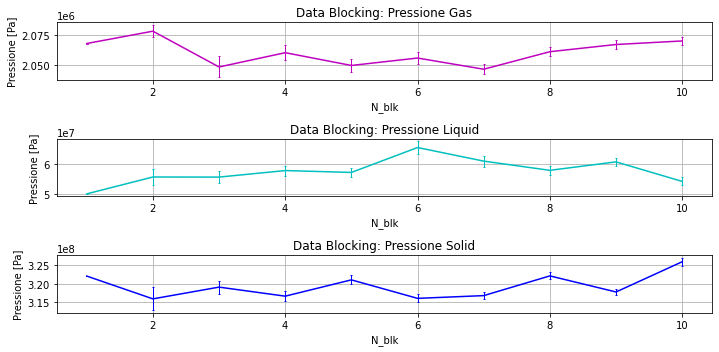

In [13]:
fig=plt.figure(figsize=(10, 5))

plt.subplot(3,1,1)
x, f, error = np.loadtxt("MonteCarlo_NVT_MC/Gas/Risultati/output_pres.dat", usecols=(0,1,3), unpack='true')
plt.errorbar(x, f*e/pow(sigma,3), yerr=error*e/pow(sigma,3), elinewidth=1, capsize=1, ms=3, color = 'm')
plt.xlabel('N_blk')
plt.ylabel("Pressione [Pa]")
plt.title("Data Blocking: Pressione Gas")
plt.grid(True)



plt.subplot(3,1,2)
x, f, error = np.loadtxt("MonteCarlo_NVT_MC/Liquid/Risultati/output_pres.dat", usecols=(0,1,3), unpack='true')
plt.errorbar(x, f*e/pow(sigma,3), yerr=error*e/pow(sigma,3), elinewidth=1, capsize=1, ms=3, color = 'c')
plt.xlabel('N_blk')
plt.ylabel("Pressione [Pa]")
plt.title("Data Blocking: Pressione Liquid")
plt.grid(True)


plt.subplot(3,1,3)
x, f, error = np.loadtxt("MonteCarlo_NVT_MC/Solid/Risultati/output_pres.dat", usecols=(0,1,3), unpack='true')
plt.errorbar(x, f*e/pow(sigma,3), yerr=error*e/pow(sigma,3), elinewidth=1, capsize=1, ms=3, color = 'b')
plt.xlabel('N_blk')
plt.ylabel("Pressione [Pa]")
plt.title("Data Blocking: Pressione Solid")
plt.grid(True)


plt.tight_layout()
plt.show()

### U/N

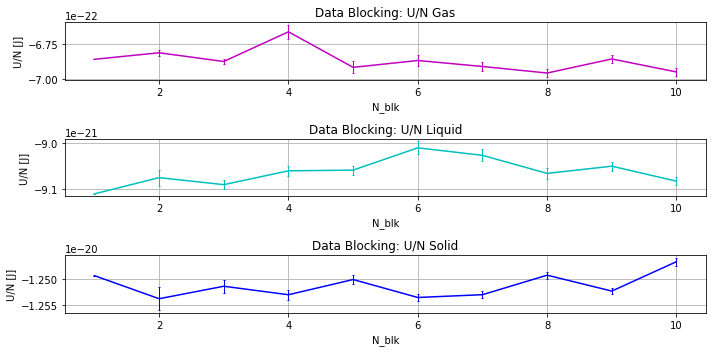

In [14]:
fig=plt.figure(figsize=(10, 5))

plt.subplot(3,1,1)
x, f, error = np.loadtxt("MonteCarlo_NVT_MC/Gas/Risultati/output_epot.dat", usecols=(0,1,3), unpack='true')
plt.errorbar(x, f*e, yerr=error*e, elinewidth=1, capsize=1, ms=3, color = 'm')
plt.xlabel('N_blk')
plt.ylabel("U/N [J]")
plt.title("Data Blocking: U/N Gas")
plt.grid(True)



plt.subplot(3,1,2)
x, f, error = np.loadtxt("MonteCarlo_NVT_MC/Liquid/Risultati/output_epot.dat", usecols=(0,1,3), unpack='true')
plt.errorbar(x, f*e, yerr=error*e, elinewidth=1, capsize=1, ms=3, color = 'c')
plt.xlabel('N_blk')
plt.ylabel("U/N [J]")
plt.title("Data Blocking: U/N Liquid")
plt.grid(True)


plt.subplot(3,1,3)
x, f, error = np.loadtxt("MonteCarlo_NVT_MC/Solid/Risultati/output_epot.dat", usecols=(0,1,3), unpack='true')
plt.errorbar(x, f*e, yerr=error*e, elinewidth=1, capsize=1, ms=3, color = 'b')
plt.xlabel('N_blk')
plt.ylabel("U/N [J]")
plt.title("Data Blocking: U/N Solid")
plt.grid(True)


plt.tight_layout()
plt.show()

### G(r)

Le funzioni di distribuzione radiale ottenute con MC e NVE mostrano lo stesso andamento qualitativo. Notiamo che le MC sono più lisce.

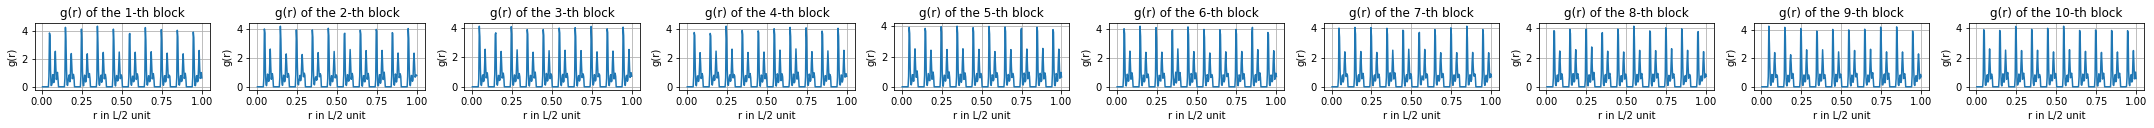

In [15]:
fig=plt.figure(figsize=(30, 15))

nblk=10

data = np.loadtxt('NVE/risultati_solid/output_gofr.dat')
datalist = np.split(data,nblk)
for i in range(len(datalist)):
    plt.subplot(10,10,i+1)
    plt.plot(np.arange(1./len(datalist[1]),1.+1./len(datalist[1]),1./len(datalist[1])),datalist [i])
    plt.xlabel("r in L/2 unit")
    plt.ylabel("g(r)")
    plt.title("g(r) of the "+str(i+1)+"-th block")
    plt.grid()
plt.tight_layout()
plt.show()

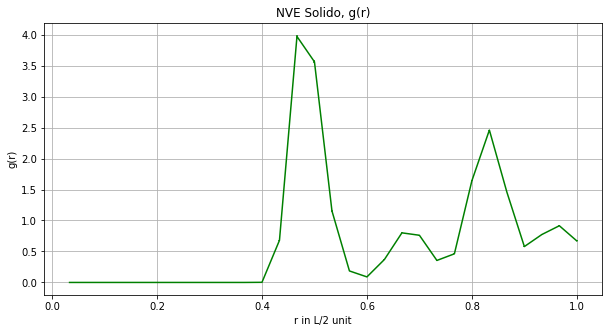

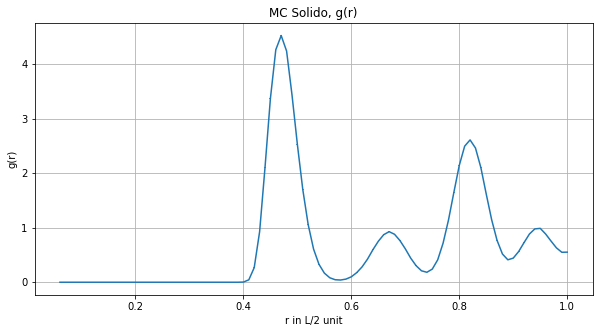

In [16]:
fig=plt.figure(figsize=(10, 5))
nbin=30
data = np.loadtxt('NVE/risultati_solid/ave_gofr.dat')
datalist = np.split(data,nbin)
gofr= np.zeros(nbin)
error= np.zeros(nbin)
for i in range (nbin):
    gofr[i]=datalist[i][9][2]
    error[i]=datalist[i][9][3]

plt.errorbar(np.arange(1./nbin, 1.+1./nbin, 1./nbin),gofr, yerr=error, color='g')
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.title("NVE Solido, g(r)")
plt.grid()
plt.show()


fig=plt.figure(figsize=(10, 5))

nblk=10
data = np.loadtxt('MonteCarlo_NVT_MC/Solid/Risultati/output_gofr.dat', usecols=(2))
datalist = np.split(data,nblk)
i, data, error = np.loadtxt('MonteCarlo_NVT_MC/Solid/Risultati/output_gave.dat', usecols=(0,1,2),delimiter='	', unpack='true', skiprows=(nblk-1)*len(datalist[1]))

plt.errorbar(np.arange(1./len(datalist[1]),1.+1./len(datalist[1]),1./len(datalist[1])),data, yerr=error)
plt.title("MC Solido, g(r)")
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.grid()
plt.show()

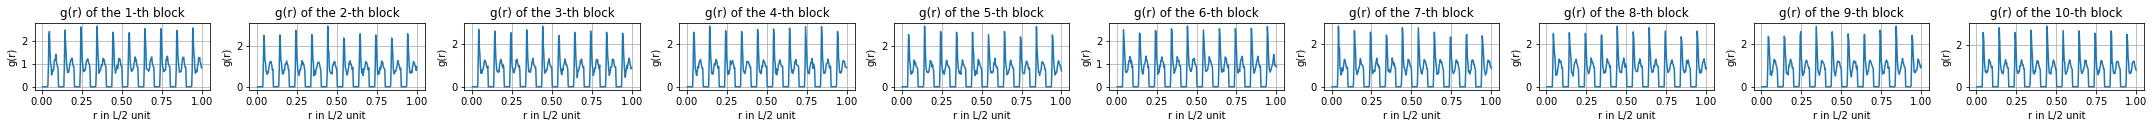

In [17]:
fig=plt.figure(figsize=(30, 15))

nblk=10

data = np.loadtxt('NVE/risultati_liquid/output_gofr.dat')
datalist = np.split(data,nblk)
for i in range(len(datalist)):
    plt.subplot(10,10,i+1)
    plt.plot(np.arange(1./len(datalist[1]),1.+1./len(datalist[1]),1./len(datalist[1])),datalist [i])
    plt.xlabel("r in L/2 unit")
    plt.ylabel("g(r)")
    plt.title("g(r) of the "+str(i+1)+"-th block")
    plt.grid()
plt.tight_layout()
plt.show()

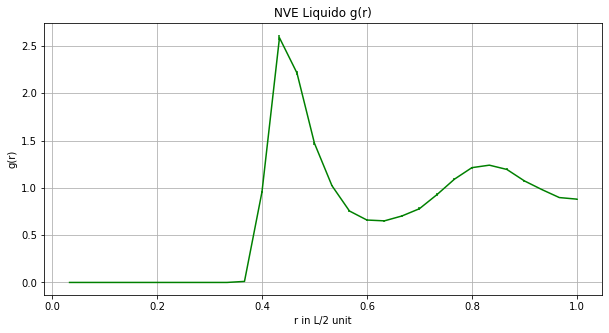

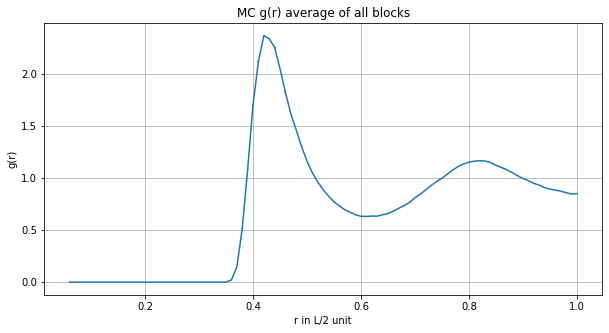

In [18]:
fig=plt.figure(figsize=(10, 5))
nbin=30
data = np.loadtxt('NVE/risultati_liquid/ave_gofr.dat')

datalist = np.split(data,nbin)
gofr= np.zeros(nbin)
error= np.zeros(nbin)
for i in range (nbin):
    gofr[i]=datalist[i][9][2]
    error[i]=datalist[i][9][3]

plt.errorbar(np.arange(1./nbin, 1.+1./nbin, 1./nbin),gofr, yerr=error, color='g')
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.title("NVE Liquido g(r)")
plt.grid()
plt.show()



fig=plt.figure(figsize=(10, 5))
data = np.loadtxt('MonteCarlo_NVT_MC/Liquid/Risultati/output_gofr.dat', usecols=(2))
datalist = np.split(data,nblk)
i, data, error = np.loadtxt('MonteCarlo_NVT_MC/Liquid/Risultati/output_gave.dat', usecols=(0,1,2),delimiter='	', unpack='true', skiprows=(nblk-1)*len(datalist[1]))

plt.errorbar(np.arange(1./len(datalist[1]),1.+1./len(datalist[1]),1./len(datalist[1])),data, yerr=error)
plt.title("MC g(r) average of all blocks")
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.grid()
plt.show()

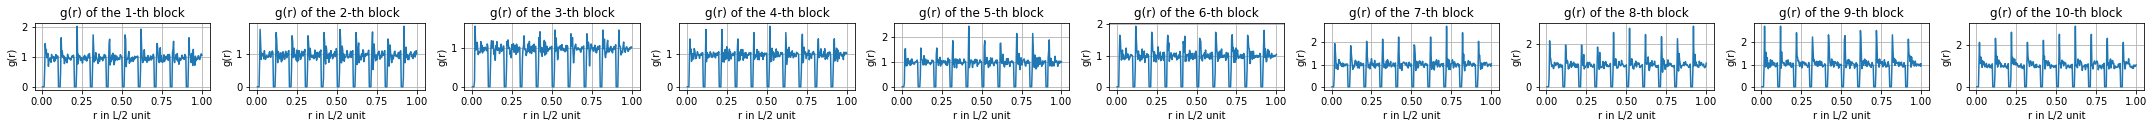

In [19]:
fig=plt.figure(figsize=(30, 15))

nblk=10

data = np.loadtxt('NVE/risultati_gas/output_gofr.dat')
datalist = np.split(data,nblk)
for i in range(len(datalist)):
    plt.subplot(10,10,i+1)
    plt.plot(np.arange(1./len(datalist[1]),1.+1./len(datalist[1]),1./len(datalist[1])),datalist [i])
    plt.xlabel("r in L/2 unit")
    plt.ylabel("g(r)")
    plt.title("g(r) of the "+str(i+1)+"-th block")
    plt.grid()
plt.tight_layout()
plt.show()

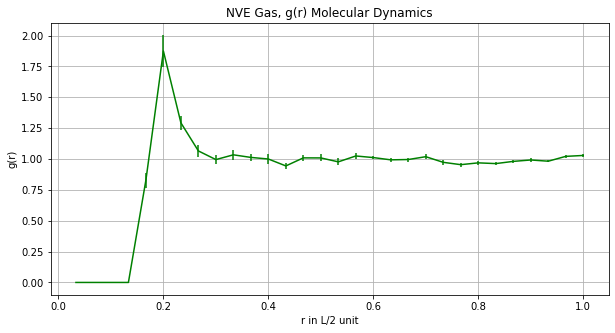

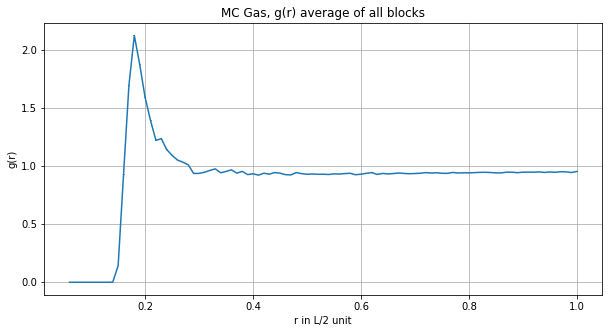

In [20]:
fig=plt.figure(figsize=(10, 5))
nbin=30
data = np.loadtxt('NVE/risultati_gas/ave_gofr.dat')
datalist = np.split(data,nbin)
gofr= np.zeros(nbin)
error= np.zeros(nbin)
for i in range (nbin):
    gofr[i]=datalist[i][9][2]
    error[i]=datalist[i][9][3]

plt.errorbar(np.arange(1./nbin, 1.+1./nbin, 1./nbin),gofr, yerr=error, color='g')
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.title("NVE Gas, g(r) Molecular Dynamics")
plt.grid()
plt.show()



fig=plt.figure(figsize=(10, 5))
data = np.loadtxt('MonteCarlo_NVT_MC/Gas/Risultati/output_gofr.dat', usecols=(2))
datalist = np.split(data,nblk)
i, data, error = np.loadtxt('MonteCarlo_NVT_MC/Gas/Risultati/output_gave.dat', usecols=(0,1,2),delimiter='	', unpack='true', skiprows=(nblk-1)*len(datalist[1]))

plt.errorbar(np.arange(1./len(datalist[1]),1.+1./len(datalist[1]),1./len(datalist[1])),data, yerr=error)
plt.title("MC Gas, g(r) average of all blocks")
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.grid()
plt.show()